In [2]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns,plotly.express as px



In [3]:
df = pd.read_csv('healthcare-dataset-stroke-data.csv')
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [4]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [5]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [6]:
df.isna().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [7]:
# drop the column id as it does not hold weight in the analysis
df.drop('id', axis = 1, inplace = True)
#fill missing values in feature bmi with mean
df.bmi.fillna(value=df.bmi.mean(), inplace=True)

In [8]:
df.shape

(5110, 11)

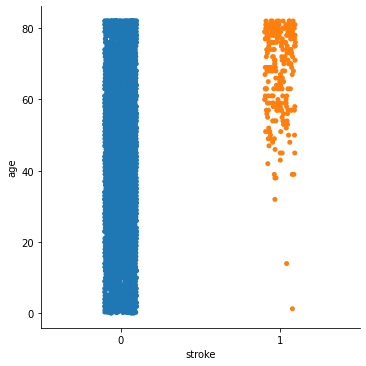

In [10]:
sns.catplot(x = "stroke", y = "age", data = df)

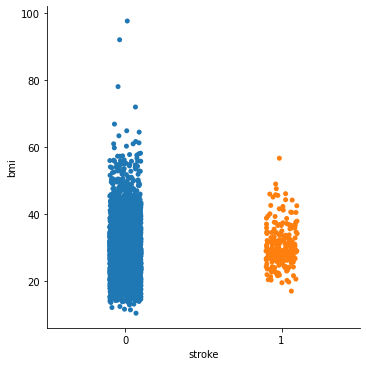

In [11]:
sns.catplot(x = "stroke", y = "bmi", data = df)

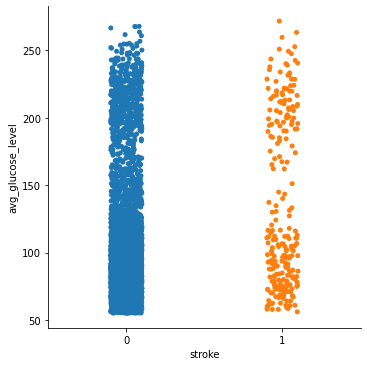

In [12]:
sns.catplot(x = "stroke", y = "avg_glucose_level", data = df)

C:\Users\USER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:title={'center':'Stroke count '}, xlabel='stroke', ylabel='count'>

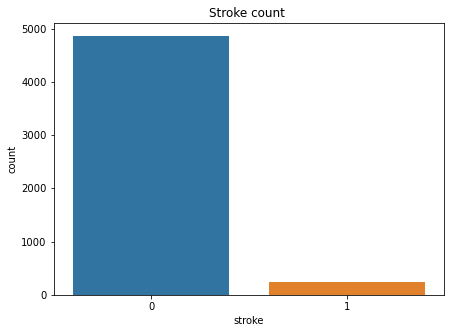

In [19]:
plt.figure(figsize = (7,5))
plt.title("Stroke count ")
sns.countplot(df.stroke)

C:\Users\USER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:title={'center':'Stroke count by heart disease'}, xlabel='stroke', ylabel='count'>

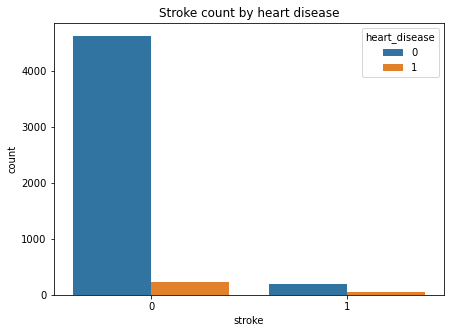

In [16]:
plt.figure(figsize = (7,5))
plt.title("Stroke count by heart disease")
sns.countplot(df.stroke, hue = df.heart_disease)

C:\Users\USER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:title={'center':'Stroke count by hypertension'}, xlabel='stroke', ylabel='count'>

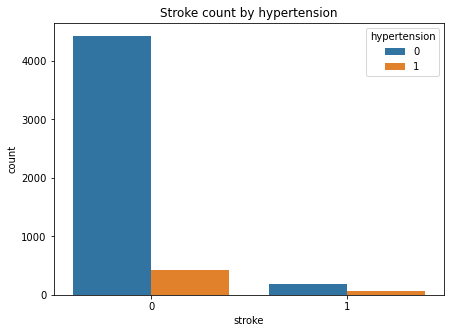

In [17]:
plt.figure(figsize = (7,5))
plt.title("Stroke count by hypertension")
sns.countplot(df.stroke, hue = df.hypertension)

C:\Users\USER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:title={'center':'Stroke count by smoking status'}, xlabel='stroke', ylabel='count'>

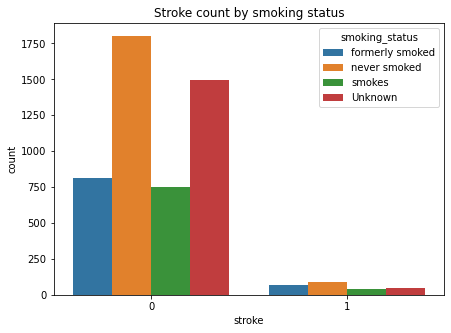

In [18]:
plt.figure(figsize = (7,5))
plt.title("Stroke count by smoking status")
sns.countplot(df.stroke, hue = df.smoking_status)

from the visualizations above, It is evident that a majority of the sample did not suffer from stroke as charecterise by "0", however, individuals of the age above 40  most likely to suffer from stroke, those with a bmi of between 20 to 50 and average glucose level of between 50 to 100 are highly at risk as evidenced by the visualizations above.